In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

from tabulate import tabulate

In [3]:
df = pd.read_csv("Datasets/iris.csv")

conditions = [df["Class"] == i for i in set(df["Class"])]
labels = [i for i in set(df["Class"])]
variable = "PetalLength"

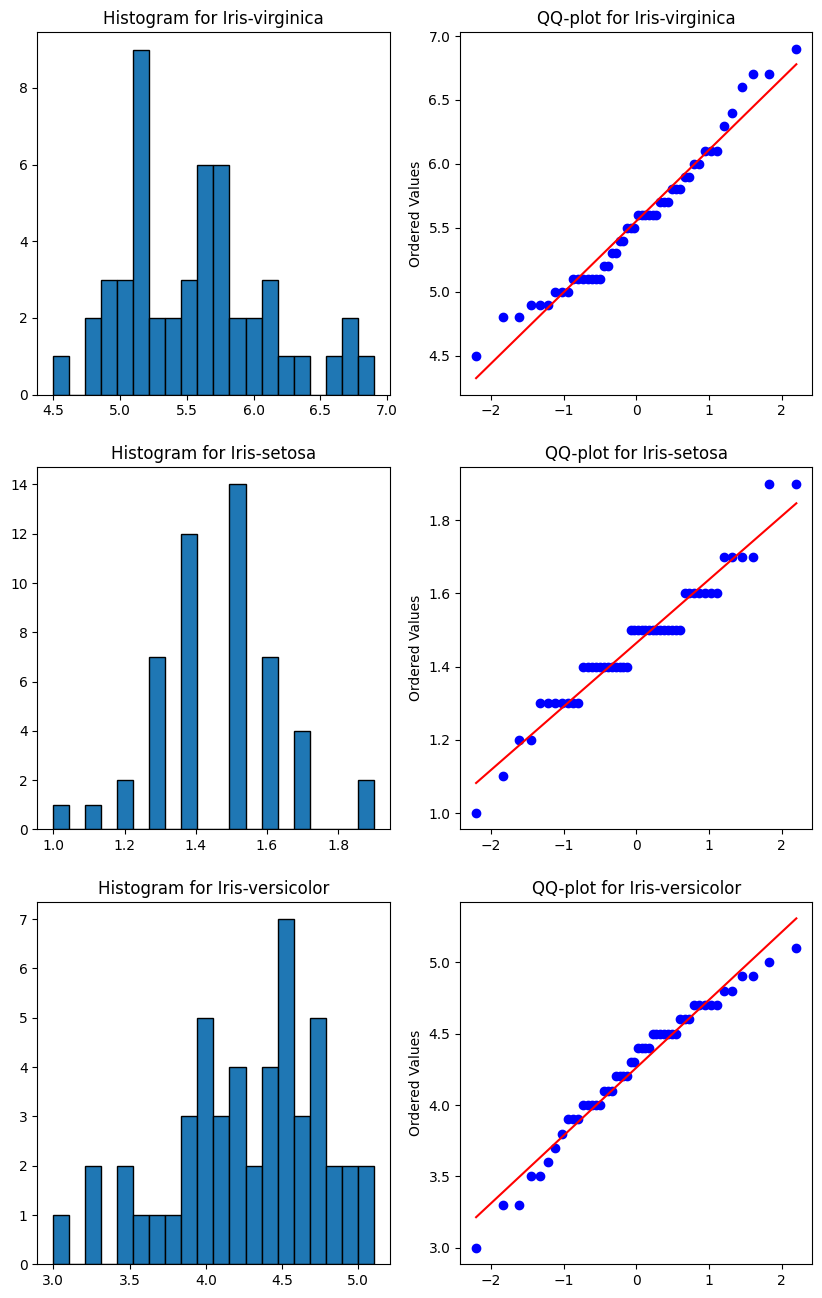

In [4]:
# Graphical verification of assumptions about normality
# For that purpose histograms and qq-plots are built

fig, axes = plt.subplots(nrows=len(labels), ncols=2, figsize=(10, 16))

for i, label in enumerate(labels):
    data = df[conditions[i]][variable]
    # Histogram
    n, bins, patches = axes[i, 0].hist(data, bins=20, edgecolor="black")
    axes[i, 0].set_title(f"Histogram for {label}")
    # QQ-plot
    stats.probplot(data, dist="norm", plot=axes[i, 1])
    axes[i, 1].set_title(f"QQ-plot for {labels[i]}")
    axes[i, 1].set_xlabel("")

In [5]:
# Confidence intervals for the parameters of the normal distribution
confidence = 0.95
alpha = 1 - confidence

table = []

for i, label in enumerate(labels):
    line = [label]

    data = df[conditions[i]][variable]
    n = len(data)
    std = data.std()
    mean = data.mean()
    
    # confidence interval for mean
    t = stats.t.ppf(1 - alpha/2, df=n-1)
    mean_ci = (
        round((mean - t * std / np.sqrt(n)).item(), 4), 
        round((mean + t * std / np.sqrt(n)).item(), 4),
    )
    line.append(mean_ci)

    # confidence interval for standard deviation
    hi2_lower = stats.chi2.ppf(alpha/2, df=n-1)
    hi2_upper = stats.chi2.ppf(1 - alpha/2, df=n-1)
    std_ci = (
        round(np.sqrt((n-1)*std**2/hi2_upper).item(), 4),
        round(np.sqrt((n-1)*std**2/hi2_lower).item(), 4),
    )
    line.append(std_ci)

    table.append(line)

print(tabulate(table, headers=["", "Mean", "Standard deviation"], tablefmt="fancy_grid"))

╒═════════════════╤══════════════════╤══════════════════════╕
│                 │ Mean             │ Standard deviation   │
╞═════════════════╪══════════════════╪══════════════════════╡
│ Iris-virginica  │ (5.3952, 5.7088) │ (0.461, 0.6877)      │
├─────────────────┼──────────────────┼──────────────────────┤
│ Iris-setosa     │ (1.4147, 1.5133) │ (0.1449, 0.2162)     │
├─────────────────┼──────────────────┼──────────────────────┤
│ Iris-versicolor │ (4.1265, 4.3935) │ (0.3925, 0.5856)     │
╘═════════════════╧══════════════════╧══════════════════════╛


In [6]:
# Testing hypotheses about the normal distribution
confidence = 0.95
alpha = 1 - confidence

table = []

for i in range(len(labels)):
    line = [labels[i]]

    data = df[conditions[i]][variable]
    std_data = (data - data.mean()) / data.std()
    statistic, p_value = stats.shapiro(std_data)
    line.append(statistic)
    line.append(p_value)

    if p_value > alpha:
        line.append("Yes")
    else:
        line.append("No")
    
    table.append(line)

print(tabulate(table, headers=["", "Statistic", "P-value", "Is normally distributed"], tablefmt="fancy_grid"))

╒═════════════════╤═════════════╤═══════════╤═══════════════════════════╕
│                 │   Statistic │   P-value │ Is normally distributed   │
╞═════════════════╪═════════════╪═══════════╪═══════════════════════════╡
│ Iris-virginica  │    0.962186 │ 0.109775  │ Yes                       │
├─────────────────┼─────────────┼───────────┼───────────────────────────┤
│ Iris-setosa     │    0.954946 │ 0.0546505 │ Yes                       │
├─────────────────┼─────────────┼───────────┼───────────────────────────┤
│ Iris-versicolor │    0.966004 │ 0.158478  │ Yes                       │
╘═════════════════╧═════════════╧═══════════╧═══════════════════════════╛
